<a href="https://colab.research.google.com/github/fauziass22/EDA_Netflix/blob/main/EDA_NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

DATA WRANGLING



In [ ]:
net_df=pd.read_csv("../netflix.csv")
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Assessing Data


In [ ]:
net_df.isna().sum()

show_id            0
type               0
title              1
director        1883
cast             495
country          663
date_added         1
release_year       1
rating             1
duration           1
listed_in          1
description        1
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", net_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5398 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


CLEANING DATA


In [ ]:
df_cleaned = net_df.dropna(how='any')

In [ ]:
df_cleaned.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021.0,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998.0,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


EDA
1. Berikan data tahun dengan film terbanyak


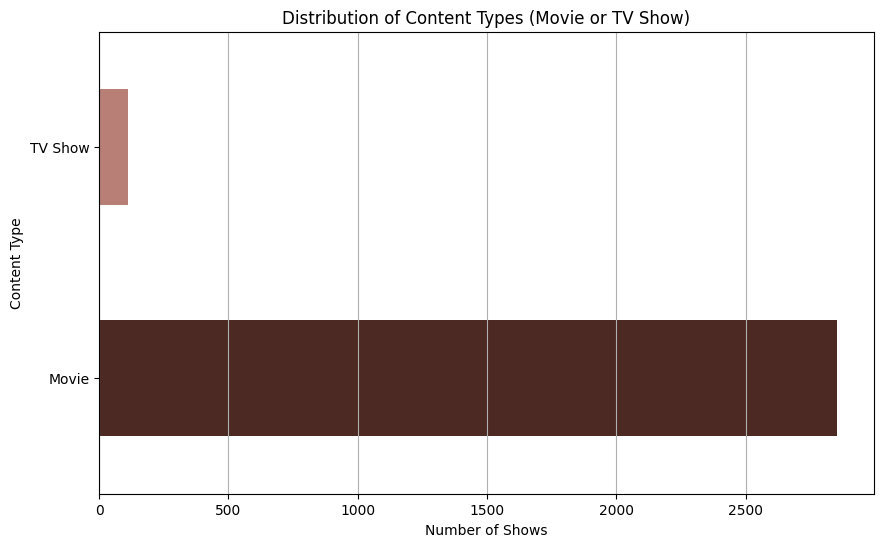

In [ ]:
plt.figure(figsize=(10, 6))
cmap = sns.cubehelix_palette(start=7, rot=0, dark=0.2, light=2, reverse=True)
content_distribution = df_cleaned['type'].value_counts()
content_distribution.plot(kind='barh', color=cmap)
plt.xlabel('Number of Shows')
plt.ylabel('Content Type')
plt.title('Distribution of Content Types (Movie or TV Show)')
plt.grid(axis='x')
plt.show()

In [ ]:
top_10_years = df_cleaned[df_cleaned['type'] == 'Movie'].groupby('release_year').size().nlargest(10).reset_index(name='count')
print(top_10_years)
table = tabulate(top_10_years, headers='keys', tablefmt='pretty', showindex=False)
print(table)

   release_year  count
0        2018.0    465
1        2019.0    438
2        2020.0    407
3        2017.0    301
4        2016.0    161
5        2021.0    146
6        2014.0    100
7        2015.0     98
8        2012.0     86
9        2013.0     83
+--------------+-------+
| release_year | count |
+--------------+-------+
|    2018.0    | 465.0 |
|    2019.0    | 438.0 |
|    2020.0    | 407.0 |
|    2017.0    | 301.0 |
|    2016.0    | 161.0 |
|    2021.0    | 146.0 |
|    2014.0    | 100.0 |
|    2015.0    | 98.0  |
|    2012.0    | 86.0  |
|    2013.0    | 83.0  |
+--------------+-------+


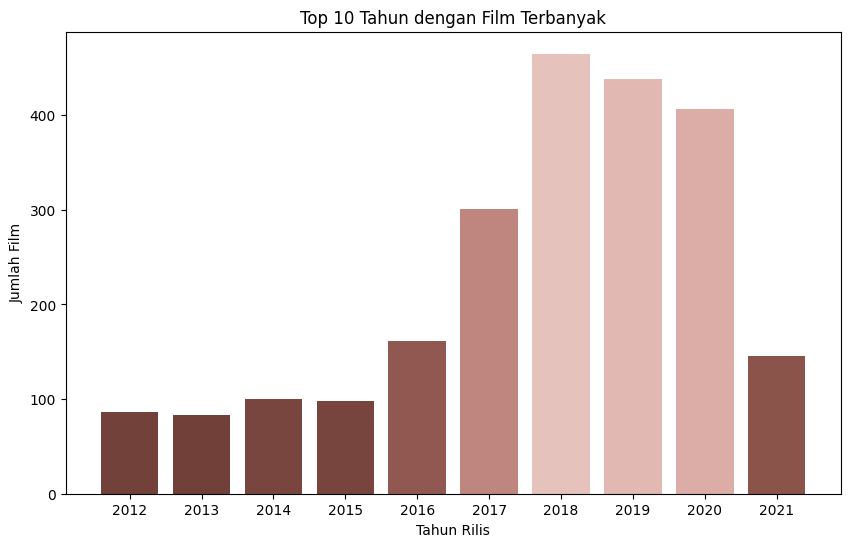

In [ ]:
top_10_years = df_cleaned[df_cleaned['type'] == 'Movie'].groupby('release_year').size().nlargest(10).reset_index(name='count')
plt.figure(figsize=(10, 6))
cmap = sns.cubehelix_palette(start=7, rot=0, dark=0.2, light=0.8, reverse=True, as_cmap=True)
plt.bar(top_10_years['release_year'], top_10_years['count'], color=cmap(top_10_years['count'] / top_10_years['count'].max()))
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film')
plt.title('Top 10 Tahun dengan Film Terbanyak')
plt.xticks(top_10_years['release_year'])
plt.show()

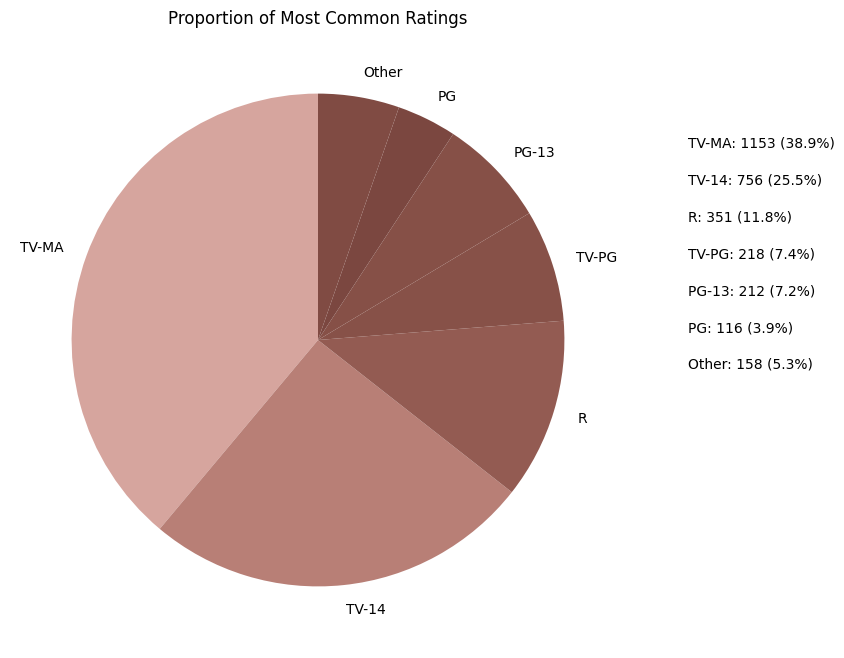

In [ ]:
rating_count = df_cleaned.groupby('rating').size().reset_index(name='count')
top_6_rating_count = rating_count.sort_values(by='count', ascending=False).head(6)
other_count = rating_count[~rating_count['rating'].isin(top_6_rating_count['rating'])]['count'].sum()
data_for_pie = pd.concat([top_6_rating_count, pd.DataFrame({'rating': ['Other'], 'count': [other_count]})])

# Plotting with gradient color on the pie chart (using "PuBu" colormap)
plt.figure(figsize=(8, 8))

# Create a gradient color based on the rating count using sns.dark_palette
cmap = sns.cubehelix_palette(start=7, rot=0, dark=0.3, light=0.7, reverse=True, as_cmap=True)

# Plot pie chart
plt.pie(data_for_pie['count'], labels=data_for_pie['rating'], autopct='', startangle=90, colors=cmap(data_for_pie['count'] / data_for_pie['count'].max()))

# Add percentage text outside the chart
for i, (rating, count) in enumerate(zip(data_for_pie['rating'], data_for_pie['count'])):
    plt.text(1.5, 0.8 - i * 0.15, f"{rating}: {count} ({count / data_for_pie['count'].sum() * 100:.1f}%)",
             color='black', ha='left', va='center')

plt.title('Proportion of Most Common Ratings')
plt.show()

In [ ]:
table = tabulate(data_for_pie, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+--------+-------+
| rating | count |
+--------+-------+
| TV-MA  | 1153  |
| TV-14  |  756  |
|   R    |  351  |
| TV-PG  |  218  |
| PG-13  |  212  |
|   PG   |  116  |
| Other  |  158  |
+--------+-------+


In [ ]:
df_filtered = df_cleaned[(df_cleaned['release_year'] >= 1999) & (df_cleaned['release_year'] <= 2020)]

# Plot
plt.figure(figsize=(10, 6))

# Plotting lines for Movie and TV Show release years
df_movie_counts = df_filtered[df_filtered['type'] == 'Movie'].groupby('release_year').size()
df_tvshow_counts = df_filtered[df_filtered['type'] == 'TV Show'].groupby('release_year').size()

# Print table for movie counts
print("Movie Counts:")
print(df_movie_counts)

# Print table for TV show counts
print("\nTV Show Counts:")
print(df_tvshow_counts)


Movie Counts:
release_year
1999.0     15
2000.0     10
2001.0     18
2002.0     12
2003.0     23
2004.0     26
2005.0     26
2006.0     37
2007.0     30
2008.0     53
2009.0     54
2010.0     56
2011.0     62
2012.0     86
2013.0     83
2014.0    100
2015.0     98
2016.0    161
2017.0    301
2018.0    465
2019.0    438
2020.0    407
dtype: int64

TV Show Counts:
release_year
2006.0     2
2010.0     1
2011.0     1
2012.0     2
2014.0     5
2015.0     2
2016.0     4
2017.0    10
2018.0    13
2019.0    23
2020.0    33
dtype: int64


<Figure size 1000x600 with 0 Axes>

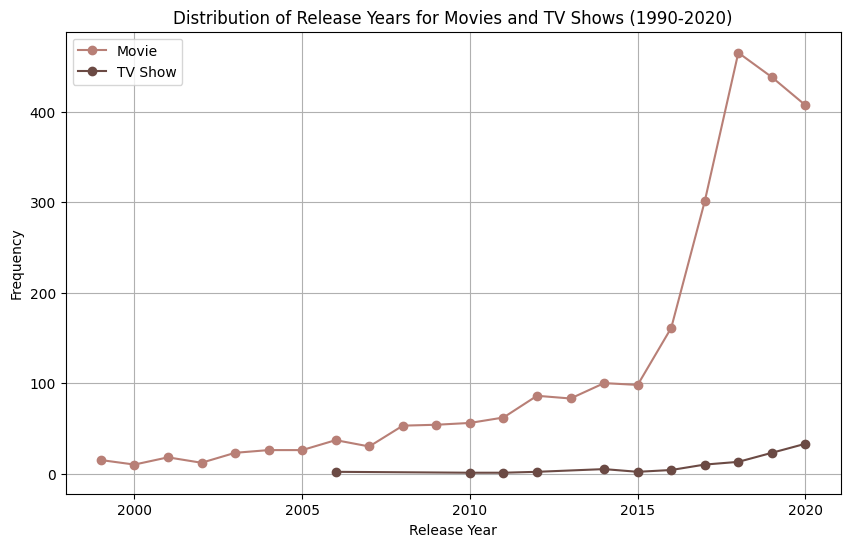

In [ ]:
df_filtered = df_cleaned[(df_cleaned['release_year'] >= 1999) & (df_cleaned['release_year'] <= 2020)]

# Plot
plt.figure(figsize=(10, 6))

# Plotting lines for Movie and TV Show release years
df_filtered[df_filtered['type'] == 'Movie'].groupby('release_year').size().plot(label='Movie', marker='o', linestyle='-',color='#b87f76')
df_filtered[df_filtered['type'] == 'TV Show'].groupby('release_year').size().plot(label='TV Show', marker='o', linestyle='-',color='#6b4a44')

plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years for Movies and TV Shows (1990-2020)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-14-cdced8e7124e>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mf.columns, rotation=45, ha='right')


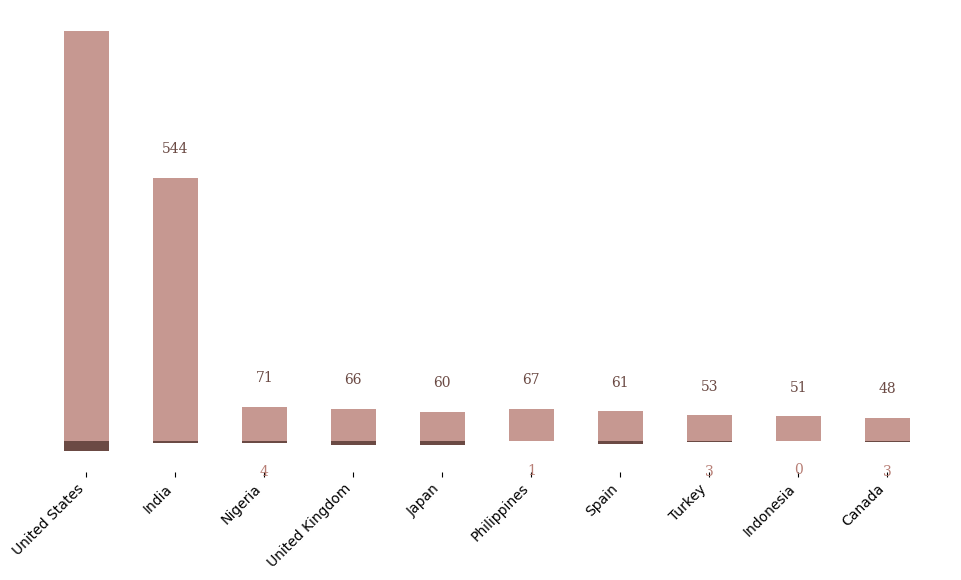

In [ ]:
top_countries = df_cleaned['country'].value_counts().head(10).index

# Create a DataFrame for Movie and TV Show countries
mf = df_cleaned.groupby('type')['country'].value_counts().unstack().sort_index().fillna(0).astype(int)[top_countries]

movie = mf.loc['Movie']
tv = -mf.loc['TV Show']

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, alpha=0.8, label='Movie', color='#b87f76')  # Set color to red
ax.bar(tv.index, tv, width=0.5, alpha=1, label='TV Show', color='#6b4a44')   # Set color to black

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}",
                   xy=(i, tv[i] - 60),
                   va='center', ha='center', fontweight='light', fontfamily='serif', color='#b87f76')

for i in movie.index:
    ax.annotate(f"{movie[i]}",
                   xy=(i, movie[i] + 60),
                   va='center', ha='center', fontweight='light', fontfamily='serif', color='#6b4a44')

# Remove spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, rotation=45, ha='right')
ax.set_yticks([])
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
combined_df = pd.concat([movie, tv.abs()], axis=1, keys=['Movie', 'TV Show'])

# Display the table
table = tabulate(combined_df, headers='keys', tablefmt='pretty')
print(table)

+----------------+-------+---------+
|    country     | Movie | TV Show |
+----------------+-------+---------+
| United States  |  849  |   20    |
|     India      |  544  |    5    |
|    Nigeria     |  71   |    4    |
| United Kingdom |  66   |    8    |
|     Japan      |  60   |    9    |
|  Philippines   |  67   |    1    |
|     Spain      |  61   |    6    |
|     Turkey     |  53   |    3    |
|   Indonesia    |  51   |    0    |
|     Canada     |  48   |    3    |
+----------------+-------+---------+


<ipython-input-15-0ace36374847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['genre'] = df_cleaned['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
<ipython-input-15-0ace36374847>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


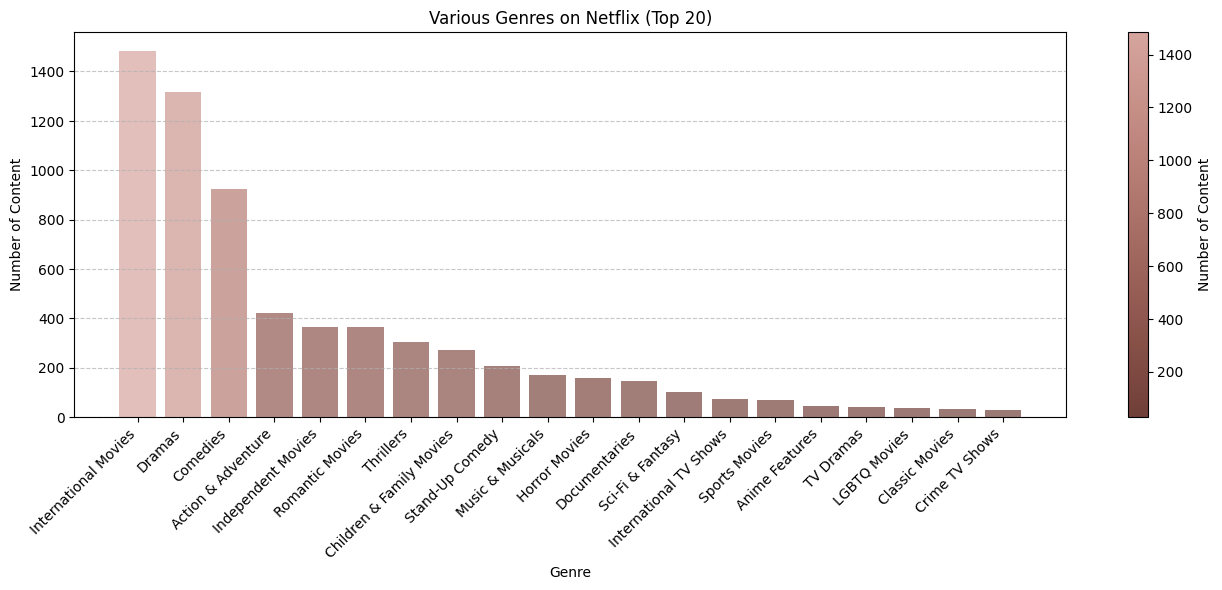

In [ ]:
# Extracting genres
df_cleaned['genre'] = df_cleaned['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))

# Counting genres
key_value = {}  # key - genre, value - number of content
for g1 in df_cleaned['genre']:
    for g2 in g1:
        if g2 not in key_value:
            key_value[g2] = 0
        key_value[g2] += 1

# Creating DataFrame for top genres
df_upd = pd.DataFrame(data=list(zip(key_value.keys(), key_value.values())),
                       columns=['genre', 'Number of content']).sort_values('Number of content',
                                                                           ascending=False)[0:20]

# Plotting with gradient color on one bar
plt.figure(figsize=(16, 5))

# Create a gradient color based on the number of content
cmap = sns.cubehelix_palette(start=7, rot=0, dark=0.3, light=0.7, reverse=True, as_cmap=True)
color_gradients = df_upd['Number of content'] / df_upd['Number of content'].max()

bars = plt.bar(df_upd['genre'], df_upd['Number of content'], color=cmap(color_gradients), alpha=0.7)
plt.xlabel('Genre')
plt.ylabel('Number of Content')
plt.title('Various Genres on Netflix (Top 20)')

# Adding color gradient legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=df_upd['Number of content'].min(), vmax=df_upd['Number of content'].max()))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Number of Content')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
table = tabulate(df_upd, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+--------------------------+-------------------+
|          genre           | Number of content |
+--------------------------+-------------------+
|   International Movies   |       1485        |
|          Dramas          |       1315        |
|         Comedies         |        925        |
|    Action & Adventure    |        421        |
|    Independent Movies    |        365        |
|     Romantic Movies      |        364        |
|        Thrillers         |        303        |
| Children & Family Movies |        271        |
|     Stand-Up Comedy      |        208        |
|     Music & Musicals     |        172        |
|      Horror Movies       |        157        |
|      Documentaries       |        147        |
|     Sci-Fi & Fantasy     |        102        |
|  International TV Shows  |        72         |
|      Sports Movies       |        70         |
|      Anime Features      |        46         |
|        TV Dramas         |        41         |
|       LGBTQ Movies

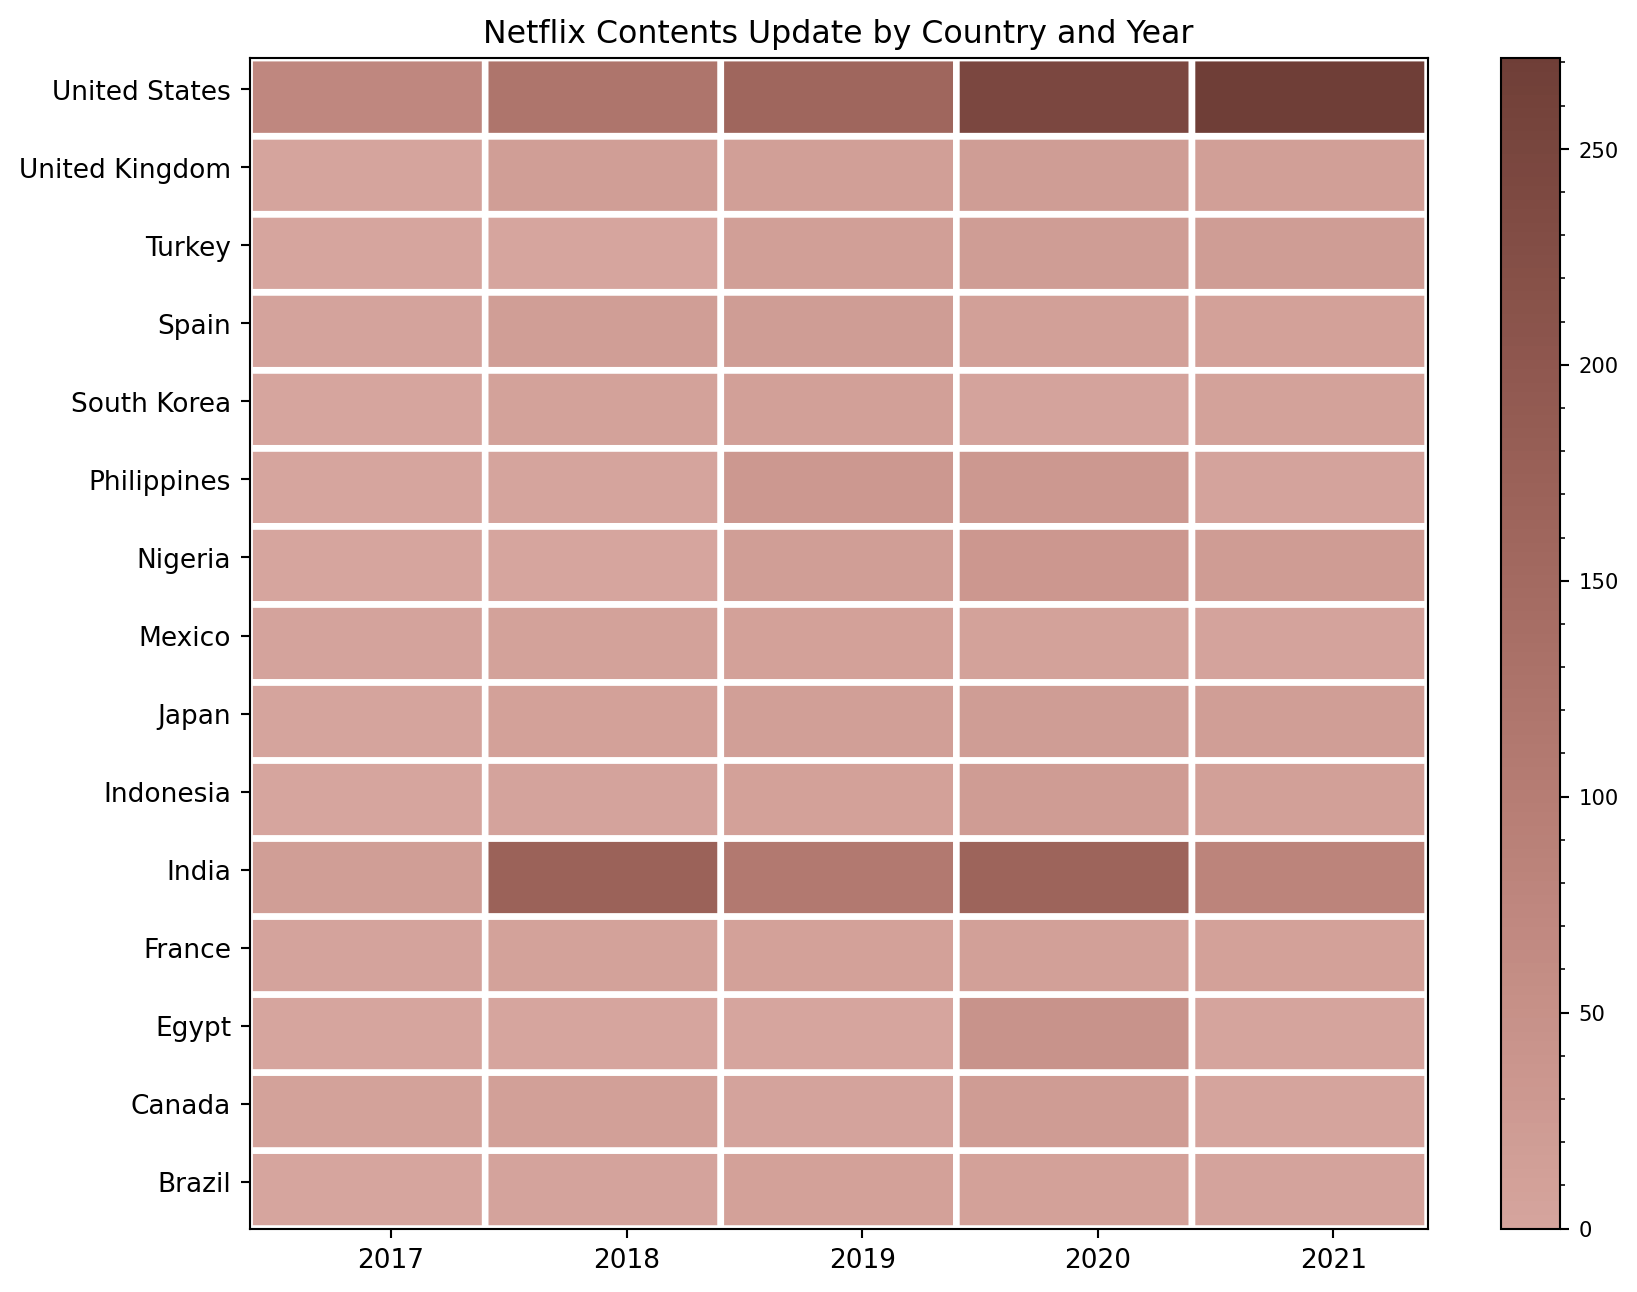

In [ ]:
import seaborn as sns

# Selecting the top 10 countries
top_countries = df_cleaned['country'].value_counts().head(15).index

# Creating a new DataFrame with country, year, and month
new_date_country = df_cleaned[['country', 'date_added']].dropna()
new_date_country['year'] = new_date_country['date_added'].apply(lambda x: x.split(', ')[-1])

# Filtering data for the top 10 countries
new_date_country_top10 = new_date_country[new_date_country['country'].isin(top_countries)]

# Creating a pivot table for the heatmap
df_heatmap = new_date_country_top10.groupby(['country', 'year']).size().unstack().fillna(0)

# Plotting the heatmap with reversed color gradient
plt.figure(figsize=(10, 8), dpi=190)
cmap = sns.cubehelix_palette(start=7, rot=0, dark=0.3, light=0.7, as_cmap=True)
plt.pcolor(df_heatmap, cmap=cmap, linewidths=2.5, edgecolors='w', vmin=0, vmax=df_heatmap.max().max())

# Setting ticks and labels
plt.xticks(np.arange(0.6, len(df_heatmap.columns), 1), df_heatmap.columns, fontsize=10)
plt.yticks(np.arange(0.6, len(df_heatmap.index), 1), df_heatmap.index, fontsize=10)

# Adding title and color bar
plt.title('Netflix Contents Update by Country and Year')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

# Display the plot
plt.show()
